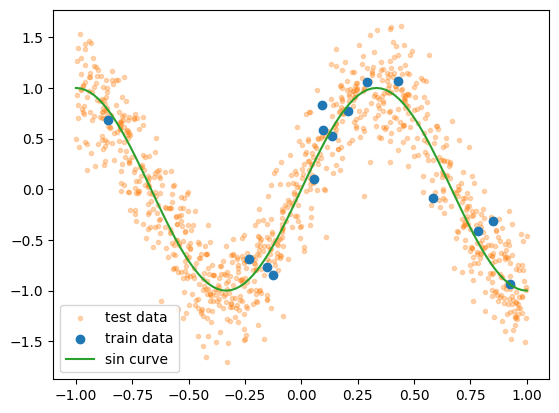

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(0)
torch.manual_seed(0)
torch.is_anomaly_check_nan_enabled()
torch.autograd.set_detect_anomaly(True)

def generate_data(n, sigma):
    x = np.random.uniform(-1, 1, n)
    y = np.sin(1.5 * np.pi * x) + np.random.normal(0, sigma, n)
    return x, y


train_data = generate_data(15, 0.3)
test_data = generate_data(1000, 0.3)
plt.scatter(test_data[0], test_data[1], marker=".", c='tab:orange', label='test data', alpha=0.3)
plt.scatter(train_data[0], train_data[1], c='tab:blue', label='train data')

x = np.linspace(-1, 1, 100)
y = np.sin(1.5 * np.pi * x)
plt.plot(x, y, c='tab:green', label='sin curve')
plt.legend()
plt.show()

In [89]:
def fitting_with_degree(degree, alpha=0.1, train_data=train_data):
    poly = PolynomialFeatures(degree=degree)
    X_train = poly.fit_transform(train_data[0].reshape(-1, 1))
    X_train = torch.tensor(X_train, dtype=torch.float32)
    y_train = torch.tensor(train_data[1], dtype=torch.float32).reshape(-1, 1)

    # モデルの定義
    model = torch.nn.Sequential(
        torch.nn.Linear(degree+1, 1, bias=False)
    )

    loss = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

    max_iter = 10000
    for _ in range(max_iter):
        optimizer.zero_grad()
        y_pred = model(X_train)
        mse = loss(y_pred, y_train) + alpha * torch.norm(y_pred, p=2) ** 2
        mse.backward()
        optimizer.step()

    y_pred = model(X_train)
    print("deg", degree, "fitting loss", loss(y_pred, y_train))
    return model.state_dict()['0.weight'].detach().numpy().reshape(-1)

In [90]:
weight_dict = {}
train_loss_history = []
test_loss_history = []
for degree in range(2, 60):
    w = fitting_with_degree(degree, alpha=0.5, train_data=train_data)
    weight_dict[degree] = w

    train_x_poly = PolynomialFeatures(degree=degree).fit_transform(train_data[0].reshape(-1, 1))
    train_loss = np.mean((train_data[1] - train_x_poly @ w) ** 2)
    train_loss_history.append(train_loss)

    test_x_poly = PolynomialFeatures(degree=degree).fit_transform(test_data[0].reshape(-1, 1))
    test_loss = np.mean((test_data[1] - test_x_poly @ w) ** 2)
    test_loss_history.append(test_loss)

deg 2 fitting loss tensor(0.4934, grad_fn=<MseLossBackward0>)
deg 3 fitting loss tensor(0.4219, grad_fn=<MseLossBackward0>)
deg 4 fitting loss tensor(0.4076, grad_fn=<MseLossBackward0>)
deg 5 fitting loss tensor(0.4069, grad_fn=<MseLossBackward0>)
deg 6 fitting loss tensor(0.4017, grad_fn=<MseLossBackward0>)
deg 7 fitting loss tensor(0.3999, grad_fn=<MseLossBackward0>)
deg 8 fitting loss tensor(0.3993, grad_fn=<MseLossBackward0>)
deg 9 fitting loss tensor(0.3989, grad_fn=<MseLossBackward0>)
deg 10 fitting loss tensor(0.3989, grad_fn=<MseLossBackward0>)
deg 11 fitting loss tensor(0.3991, grad_fn=<MseLossBackward0>)
deg 12 fitting loss tensor(0.3989, grad_fn=<MseLossBackward0>)
deg 13 fitting loss tensor(0.3991, grad_fn=<MseLossBackward0>)
deg 14 fitting loss tensor(0.3992, grad_fn=<MseLossBackward0>)
deg 15 fitting loss tensor(0.3991, grad_fn=<MseLossBackward0>)
deg 16 fitting loss tensor(0.3992, grad_fn=<MseLossBackward0>)
deg 17 fitting loss tensor(0.3993, grad_fn=<MseLossBackward0>)


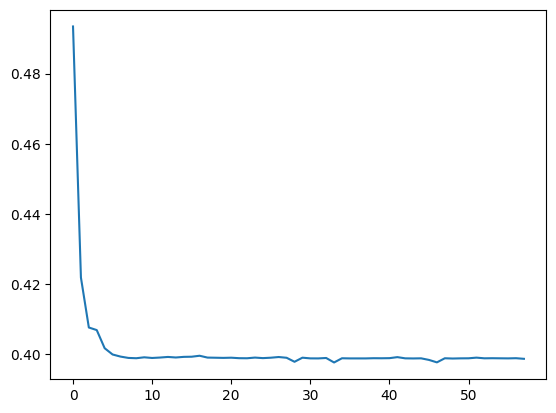

In [93]:
plt.plot(train_loss_history, label='train loss')

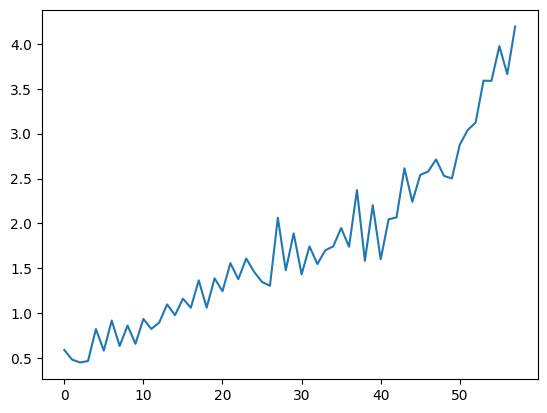

In [92]:
plt.plot(test_loss_history, label='test loss')

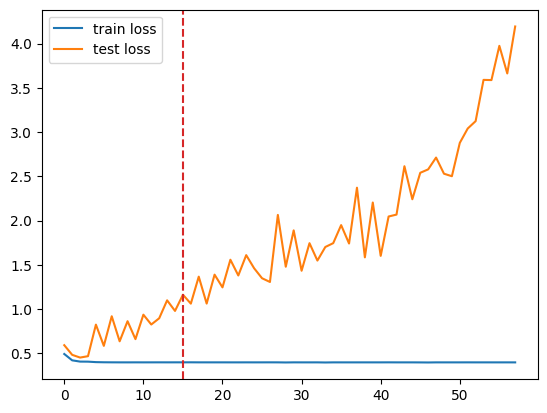

In [91]:
plt.plot(train_loss_history, label='train loss')
plt.plot(test_loss_history, label='test loss')
plt.axvline(x=15, color='tab:red', linestyle='--')
plt.legend()
plt.show()